# 3. Model Development

### Table of Contents
- [Importing Packages](#Importing-Packages)
- [Loading Training and Test Sets](#Load-Training-and-Test-Sets)
- [Machine Learning Techniques for Classification:](#Machine-Learning-Techniques-for-Classification)
    - [Decision Tree](#1.-Decision-Tree )
    - [Naive Bayes](#2.-Naive-Bayes)
    - [Rule Based](#3.-Rule-Based)
    - [k-NN](#4.-K-NN) 
    - [Random Forest](#5.-Random-Forest)
    - [Gradient Boosting](#6.-Gradient-Boosting)
    - [MLP](#7.-MLP) 
  
- [Model Selection and Performance Evaluation](#4-Model-Selection-and-Performance-Evaluation)
    - [Cross validation accuracy](#Cross-Validation-Accuracy)
    - [Confusion Matrix](#Confusion-Matrix)

###  Navigation
- [Table of Contents](../Table_of_contents.ipynb)
- [Data Preparation and Exploration](../Data_exploration/Data_Exploration.ipynb)
- [Data Preprocessing](../preprocesing/Preprocessing.ipynb)
- [Model Development](../conf/list_of_models.ipynb)
- [Model Selection and Performance Evaluation](../conf/list_of_performance_evaluations.ipynb)

### Importing Packages

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# libraries for dimensional reduction
from sklearn.preprocessing import StandardScaler

#libraries for train_test_split and corss validation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### Load Training and Test Sets

In [2]:
X_test_path = '../dataset/X_corr_test.csv'
X_test = pd.read_csv(X_test_path, na_values="?")

y_test_path = '../dataset/y_corr_test.csv'
y_test_df = pd.read_csv(y_test_path)
y_test = y_test_df['Pattern_Type'].values.ravel()


X_train_balanced_path = '../dataset/X_corr_train_balanced.csv'
X_train_balanced = pd.read_csv(X_train_balanced_path, na_values="?")

y_train_balanced_path = '../dataset/y_corr_train_balanced.csv'
y_train_balanced_df = pd.read_csv(y_train_balanced_path)
y_train_balanced = y_train_balanced_df['Pattern_Type'].values.ravel()

##           Machine Learning Techniques for Classification

#### 1. Decision Tree 

 pipeline of decision tree and cross-validation

In [3]:
# Constructing Decision Tree Pipeline which includes:
# 1. StandardScaler(): standardizing features to insure that every features are contributing equally to the model  
# 2. DecisionTreeClassifier: a tree-based classifier with a fixed random state for reproducibility

dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# performing cross-validation to evaluate model's preformance
# 5-fold cross validation means:
#    - split the dataset into 5 equal folds
#    - train the model on 4 folds and test it on one fold
#    - repeat this process 5 times 
#And calculate cross validation accuracy as a preformance metric
dt_scores = cross_val_score(dt_pipeline, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
dt_accuracy = np.mean(dt_scores)
print(f'Decision Tree CV Accuracy: {dt_accuracy:.3f}')

Decision Tree CV Accuracy: 1.000


#### 2. Naive Bayes

pipeline and cross validation

In [4]:
# Constructing Naive Bayes pipeline which includes:
# 1. StandardScaler(): standardizing features to insure that every features are contributing equally to the model  
# 2. GaussianNB: A Naive Bayes classifier that works based on Gaussian (normal) distribution theorem

nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GaussianNB())
])

# performing cross-validation to evaluate model's preformance
# 5-fold cross validation means:
#    - split the dataset into 5 equal folds
#    - train the model on 4 folds and test it on one fold
#    - repeat this process 5 times 
#And calculate cross validation accuracy as a preformance metric
nb_scores = cross_val_score(nb_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring='accuracy')
nb_accuracy = np.mean(nb_scores)
print(f'Naive Bayes CV Accuracy: {nb_accuracy:.3f}')


Naive Bayes CV Accuracy: 0.970


#### 3. Rule Based

In [5]:
# Constructing Rule-Based pipeline which includes:
# 1. StandardScaler(): standardizing features to insure that every features are contributing equally to the model  
# 2. DecisionTreeClassifier: tree-based classifier that splits the data into subsets based on feature values
#     - the'random_state' parameter ensures reproducibility
#     - the 'criterion' parameter is set to 'entropy' to use information gain as the splitting criterion
#     - The 'max_depth' parameter limits the depth of the tree to prevent overfitting

rule_based_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=3))  # Adjust parameters as needed
])

# performing cross-validation to evaluate model's preformance
# 5-fold cross validation means:
#    - split the dataset into 5 equal folds
#    - train the model on 4 folds and test it on one fold
#    - repeat this process 5 times 
#And calculate cross validation accuracy as a preformance metric
rule_based_scores = cross_val_score(rule_based_pipeline, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
rule_based_accuracy = np.mean(rule_based_scores)
print(f'Rule-Based (Decision Tree) CV Accuracy: {rule_based_accuracy:.3f}')

Rule-Based (Decision Tree) CV Accuracy: 1.000


#### 4. K-NN 

In [6]:
# Constructing k-NN (Lazy Learner) pipeline which includes:
# 1. StandardScaler(): standardizing features to insure that every features are contributing equally to the model  
# 2. KNeighborsClassifier: that classifies data points based on the labels of their nearest neighbors

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# performing cross-validation to evaluate model's preformance
# 5-fold cross validation means:
#    - split the dataset into 5 equal folds
#    - train the model on 4 folds and test it on one fold
#    - repeat this process 5 times 
#And calculate cross validation accuracy as a preformance metric
knn_scores = cross_val_score(knn_pipeline, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
knn_accuracy = np.mean(knn_scores)
print(f'k-NN CV Accuracy: {knn_accuracy:.3f}')

k-NN CV Accuracy: 0.999


#### 5. Random Forest

In [7]:
# Constructing Random Forest pipeline which includes:
# 1. StandardScaler(): standardizing features to insure that every features are contributing equally to the model  
# 2. RandomForestClassifier: An ensemble classifier that fits multiple decision trees on various sub-samples of the dataset.

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# performing cross-validation to evaluate model's preformance
# 5-fold cross validation means:
#    - split the dataset into 5 equal folds
#    - train the model on 4 folds and test it on one fold
#    - repeat this process 5 times 
#And calculate cross validation accuracy as a preformance metric
rf_scores = cross_val_score(rf_pipeline, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
rf_accuracy = np.mean(rf_scores)
print(f'Random Forest CV Accuracy: {rf_accuracy:.3f}')

Random Forest CV Accuracy: 1.000


#### 6. Gradient Boosting 

In [8]:
# Constructing Gradient Boosting pipeline which includes:
# 1. StandardScaler(): standardizing features to insure that every features are contributing equally to the model  
# 2. GradientBoostingClassifier: An ensemble classifier

gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier(random_state=42))
])

# performing cross-validation to evaluate model's preformance
# 5-fold cross validation means:
#    - split the dataset into 5 equal folds
#    - train the model on 4 folds and test it on one fold
#    - repeat this process 5 times 
#And calculate cross validation accuracy as a preformance metric
gb_scores = cross_val_score(gb_pipeline, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
gb_accuracy = np.mean(gb_scores)
print(f'Random Forest CV Accuracy: {gb_accuracy:.3f}')

Random Forest CV Accuracy: 1.000


#### 7. MLP

In [9]:
# Constructing MLP pipeline which includes:
# 1. StandardScaler(): standardizing features to insure that every features are contributing equally to the model  
# 2. MLPClassifier: A neural network classifier

mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000, random_state=42, learning_rate_init=0.001))
])

# performing cross-validation to evaluate model's preformance
# 5-fold cross validation means:
#    - split the dataset into 5 equal folds
#    - train the model on 4 folds and test it on one fold
#    - repeat this process 5 times 
#And calculate cross validation accuracy as a preformance metric
mlp_scores = cross_val_score(mlp_pipeline, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
mlp_accuracy = np.mean(mlp_scores)
print(f'Random Forest CV Accuracy: {mlp_accuracy:.3f}')

Random Forest CV Accuracy: 1.000


# 4 Model Selection and Performance Evaluation


###  Navigation
- [Table of Contents](../Table_of_contents.ipynb)
- [Data Preparation and Exploration](../Data_exploration/Data_Exploration.ipynb)
- [Data Preprocessing](../preprocesing/Preprocessing.ipynb)
- [Model Development](../conf/list_of_models.ipynb)
- [Model Selection and Performance Evaluation](../conf/list_of_performance_evaluations.ipynb)

##### Cross Validation Accuracy 

In [10]:
# Initialize results list
results = []

# Append the result with a proper structure
results.append({'Model': 'Decision Tree', 'CV Accuracy': dt_accuracy})
results.append({'Model': 'Naive Bayes', 'CV Accuracy': nb_accuracy})
results.append({'Model': 'Rule-Based (Decision Tree)', 'CV Accuracy': rule_based_accuracy})
results.append({'Model': 'k-NN', 'CV Accuracy': knn_accuracy})
results.append({'Model': 'Random Forest', 'CV Accuracy': rf_accuracy})
results.append({'Model': 'Gradient Boosting', 'CV Accuracy': gb_accuracy})
results.append({'Model': 'MLP', 'CV Accuracy': mlp_accuracy})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by CV Accuracy for better visualization
results_df = results_df.sort_values(by='CV Accuracy', ascending=False).reset_index(drop=True)

# Style the DataFrame
def color_rows(row):
    if row.name <= 4:  # First five rows
        return [''] * (len(row) - 1) + ['background-color: cyan']
    else:  # Remaining rows
        return [''] * (len(row) - 1) + ['background-color: magenta']

styled_df = results_df.style.apply(color_rows, axis=1).format(precision=3)

# Display the styled DataFrame
styled_df

,Model,CV Accuracy
0,Decision Tree,1.000
1,Rule-Based (Decision Tree),1.000
2,Gradient Boosting,1.000
3,Random Forest,1.000
4,MLP,1.000
5,k-NN,0.999
6,Naive Bayes,0.970


##### Confusion Matrix 

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2515
           1       1.00      1.00      1.00     21841

    accuracy                           1.00     24356
   macro avg       1.00      1.00      1.00     24356
weighted avg       1.00      1.00      1.00     24356



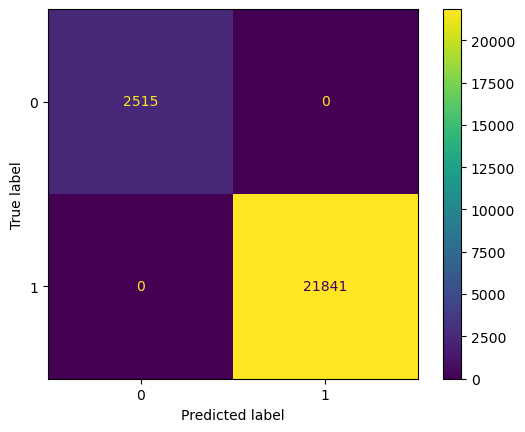

<Figure size 400x400 with 0 Axes>

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.69      0.99      0.81      2515
           1       1.00      0.95      0.97     21841

    accuracy                           0.95     24356
   macro avg       0.84      0.97      0.89     24356
weighted avg       0.97      0.95      0.96     24356



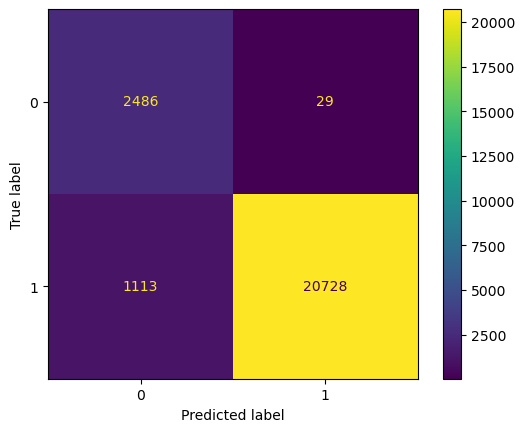

Rule-Based (Decision Tree) Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2515
           1       1.00      1.00      1.00     21841

    accuracy                           1.00     24356
   macro avg       1.00      1.00      1.00     24356
weighted avg       1.00      1.00      1.00     24356



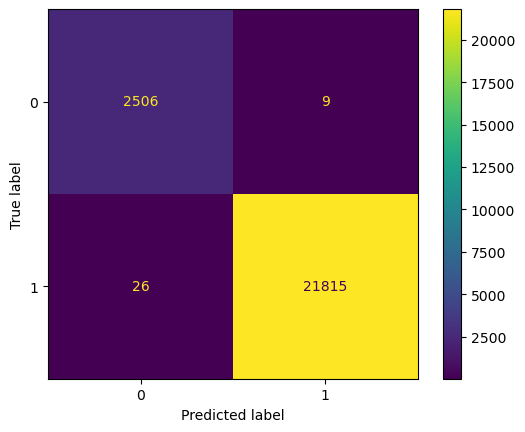

k-NN Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2515
           1       1.00      1.00      1.00     21841

    accuracy                           1.00     24356
   macro avg       0.99      1.00      1.00     24356
weighted avg       1.00      1.00      1.00     24356



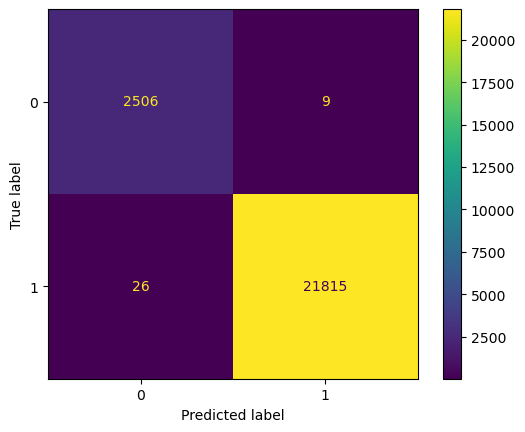

Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2515
           1       1.00      1.00      1.00     21841

    accuracy                           1.00     24356
   macro avg       1.00      1.00      1.00     24356
weighted avg       1.00      1.00      1.00     24356



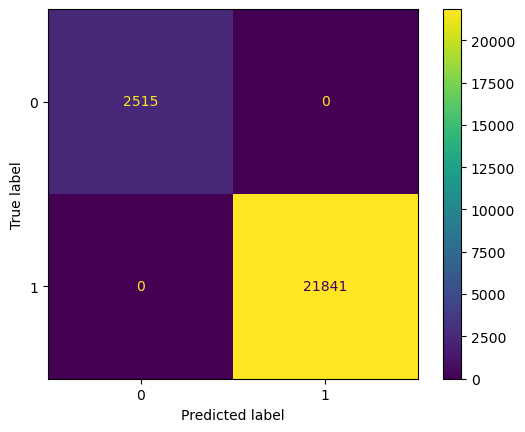

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2515
           1       1.00      1.00      1.00     21841

    accuracy                           1.00     24356
   macro avg       1.00      1.00      1.00     24356
weighted avg       1.00      1.00      1.00     24356



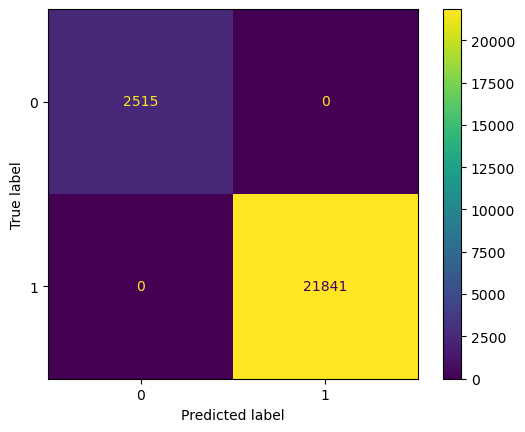

Multilayer Perceptron (MLP) Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2515
           1       1.00      1.00      1.00     21841

    accuracy                           1.00     24356
   macro avg       1.00      1.00      1.00     24356
weighted avg       1.00      1.00      1.00     24356



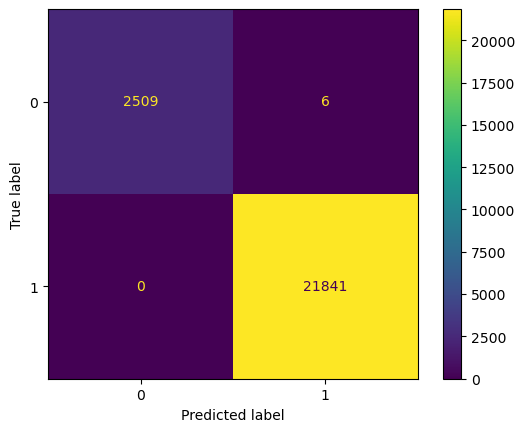

In [11]:
# Fit models on balanced training data
# The following pipelines are fitted (trained) on the training data:
# 1. Decision Tree
# 2. Naive Bayes
# 3. Rule-Based (Decision Tree)
# 4. k-Nearest Neighbors (k-NN)
# 5. Random Forest
# 6. Gradient Boosting
# 7. Multi-Layer Perceptron (MLP)
dt_pipeline.fit(X_train_balanced, y_train_balanced)
nb_pipeline.fit(X_train_balanced, y_train_balanced)
rule_based_pipeline.fit(X_train_balanced, y_train_balanced)
knn_pipeline.fit(X_train_balanced, y_train_balanced)
rf_pipeline.fit(X_train_balanced, y_train_balanced)
gb_pipeline.fit(X_train_balanced, y_train_balanced)
mlp_pipeline.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred_dt = dt_pipeline.predict(X_test)
y_pred_nb = nb_pipeline.predict(X_test)
y_pred_rule = rule_based_pipeline.predict(X_test)
y_pred_knn = knn_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_gb = gb_pipeline.predict(X_test)
y_pred_mlp = mlp_pipeline.predict(X_test)

# Confusion Matrix and Classification Report for each model
# Decisopn Tree
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.figure(figsize=(4, 4))
plt.show()

# Noive Bayes
print("Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.show()

#  Rule based
print("Rule-Based (Decision Tree) Classification Report")
print(classification_report(y_test, y_pred_rule))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.show()

#KNN
print("k-NN Classification Report")
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.show()

# Random Forest 
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

# Gradient Boosting
print("Gradient Boosting Classification Report")
print(classification_report(y_test, y_pred_gb))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb)
plt.show()

# Multilayer perceptron MLP
print("Multilayer Perceptron (MLP) Classification Report")
print(classification_report(y_test, y_pred_mlp))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)
plt.show()

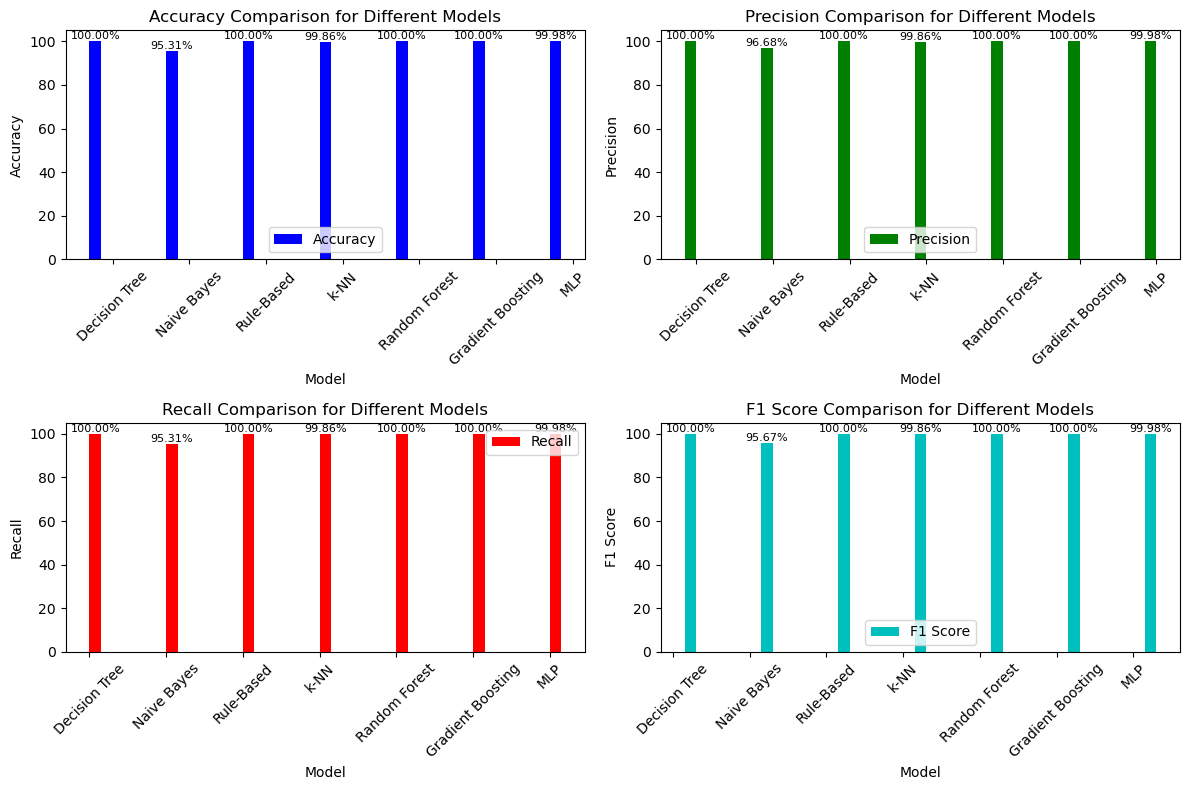

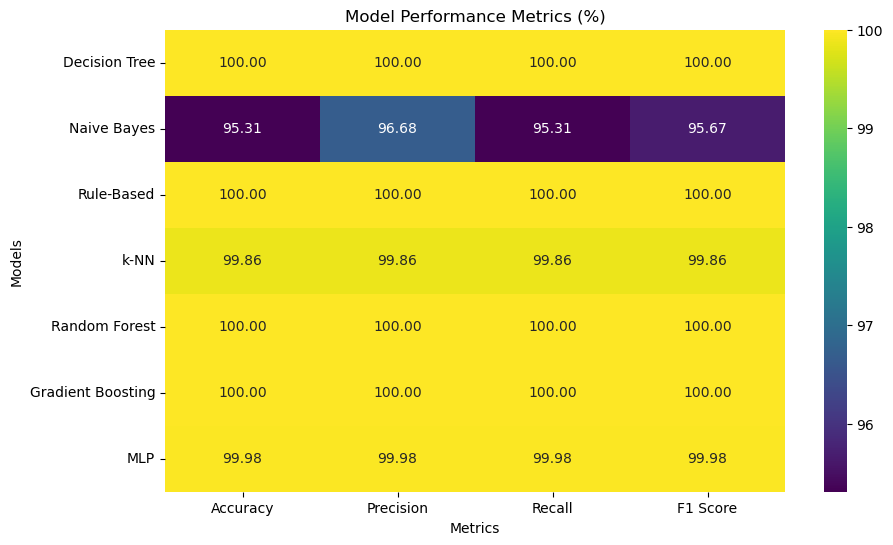

In [12]:
# Define a dictionary that maps model to their corresponding pipelines
models = {
    "Decision Tree": dt_pipeline,
    "Naive Bayes": nb_pipeline,
    "Rule-Based": rule_based_pipeline,
    "k-NN": knn_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline,
    "MLP": mlp_pipeline
}

# Define the metrics dictionary that maps metric to their corresponding functions in scikit-learn
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score
}

# Initialize dictionaries to store metrics for each model
model_metrics = {model_name: {metric_name: [] for metric_name in metrics.keys()} for model_name in models.keys()}

# Calculate metrics for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    for metric_name, metric_func in metrics.items():
        if metric_name in ["Precision", "Recall", "F1 Score"]:
            metric_value = metric_func(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
        else:
            metric_value = metric_func(y_test, y_pred)
        model_metrics[model_name][metric_name] = metric_value

# Plotting bar charts
plt.figure(figsize=(12, 8))
x = np.arange(len(models))
width = 0.15

# Define colors for each metric
colors = ['b', 'g', 'r', 'c']

for i, (metric_name, _) in enumerate(metrics.items()):
    plt.subplot(2, 2, i + 1)
    bars = plt.bar(x + i * width, [model_metrics[model_name][metric_name] * 100 for model_name in models.keys()], width, label=metric_name, color=colors[i])
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Comparison for Different Models')
    plt.xticks(x + width * (len(metrics) / 2 - 0.5), models.keys(), rotation=45)
    plt.legend()
    # Annotate bars with metric values
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', 
                 ha='center', va='bottom', fontsize=8)
plt.tight_layout()
# Save the bar chart image
comparison_confusion_matrics_model_2_path = '../images/models/comparison_confusion_matrics_model_2.png'
plt.savefig(comparison_confusion_matrics_model_2_path, dpi=600, bbox_inches='tight')
#Display the bar chart
plt.show()

# Convert the model_metrics dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(model_metrics).T

# Multiply by 100 to convert to percentages
metrics_df = metrics_df * 100

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Model Performance Metrics (%)')
plt.xlabel('Metrics')
plt.ylabel('Models')
# Save the heatmap image
heatmap_confusion_matrics_model_2_path = '../images/models/heatmap_confusion_matrics_model_2.png'
plt.savefig(heatmap_confusion_matrics_model_2_path, dpi=600, bbox_inches='tight')
# Display the heatmap
plt.show()

###  Navigation
- [Table of Contents](../Table_of_contents.ipynb)
- [Data Preparation and Exploration](../Data_exploration/Data_Exploration.ipynb)
- [Data Preprocessing](../preprocesing/Preprocessing.ipynb)
- [Model Development](../conf/list_of_models.ipynb)
- [Model Selection and Performance Evaluation](../conf/list_of_performance_evaluations.ipynb)